<a href="https://colab.research.google.com/github/Joab-S/SimulacaoEstocasticaUFC/blob/main/lista3_SimEst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install simpy

In [2]:
import random as r
import simpy as sp
import numpy as np
import matplotlib.pyplot as mp

In [ ]:
class client():
  id: int
  priority: bool
  tempo_espera: int
  chegada: int
  saida: int

  def __init__(id: int, p: bool, chegada):
    id = id
    priority = p
    tempo_espera = np.Infinity
    chegada = chegada
    saida = 0

In [ ]:
from numpy.lib.index_tricks import fill_diagonal
class NodoFila:
    """Esta classe representa um nodo de uma lista encadeada."""
    def __init__(self, dado=0, proximo_nodo=None):
        self.dado = dado
        self.proximo = proximo_nodo

    def __repr__(self):
        return '%s -> %s' % (self.dado, self.proximo)


class Fila:
    """Esta classe representa uma lista encadeada."""
    def __init__(self):
        self.cabeca = None
        self.prioridade = None

    def __repr__(self):
        return "[" + str(self.cabeca) + "]"
      
    def insere_no_inicio(fila, novo_dado):
      novo_nodo = NodoFila(novo_dado)

      novo_nodo.proximo = fill_diagonal.cabeca

      fila.cabeca = novo_nodo
    
    def insere_depois(fila, nodo_anterior, novo_dado):
      assert nodo_anterior, "Nodo anterior precisa existir na fila."
      
      novo_nodo = NodoFila(novo_dado)

      novo_nodo.proximo = nodo_anterior.proximo

      nodo_anterior.proximo = novo_nodo

    def busca(fila, valor):
      corrente = fila.cabeca
      while corrente and corrente.dado != valor:
        corrente = corrente.proximo
      return corrente


1. Primeira questão

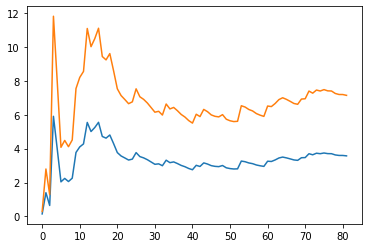

In [97]:
# a) Evolução do tempo médio e tamanho da fila ao longo do tempo.

N_CLIENTES = 0
TAXA_CHEGADA = 2
TAXA_ATENDIMENTO = 3
LIMITE = 300
TEMPO_CHEGADA = []
TEMPO_SAIDA = []
PESSOAS_NO_TEMPO = []
TEMPO = []

def subItens(a, b):
  c = []
  n = len(a)
  for i in range(n):
    c.append(a[i] - b[i])
  return c

def chegada(env):
  global N_CLIENTES
  global PESSOAS_NO_TEMPO
  global TEMPO_CHEGADA
  
  while True:
    yield env.timeout(np.random.exponential(TAXA_CHEGADA))
    N_CLIENTES = N_CLIENTES + 1
    PESSOAS_NO_TEMPO.append(N_CLIENTES)
    TEMPO_CHEGADA.append(env.now)
    TEMPO.append(env.now)
    if (N_CLIENTES == 1):
      env.process(atendimento(env))

def atendimento(env):
  global N_CLIENTES
  global PESSOAS_NO_TEMPO
  global TEMPO_SAIDA
  
  while (N_CLIENTES > 0):
    yield env.timeout(np.random.exponential(TAXA_ATENDIMENTO))
    N_CLIENTES = N_CLIENTES - 1
    TEMPO_SAIDA.append(env.now)

def systemSim():
  global CLIENTES
  global PESSOAS_NO_TEMPO
  global TEMPO_CHEGADA
  global TEMPO_SAIDA

  N_CLIENTES = 0
  TEMPO_CHEGADA = []
  TEMPO_SAIDA = []
  PESSOAS_NO_TEMPO = []

  env = sp.Environment()
  env.process(chegada(env))
  if (N_CLIENTES > 0):
    env.process(atendimento(env))
  env.run(until=LIMITE)

  return (PESSOAS_NO_TEMPO, TEMPO_SAIDA, TEMPO_CHEGADA)

systemSim()

TEMPO_DE_ESPERA = subItens(TEMPO_SAIDA, TEMPO_CHEGADA)
TEMPO_DE_ESPERA_MEDIO = []
TAMANHO_MEDIO_FILA = []

for i in range(len(TEMPO_DE_ESPERA)):
  TEMPO_DE_ESPERA_MEDIO.append((TEMPO_SAIDA[i] - TEMPO_CHEGADA[i])/PESSOAS_NO_TEMPO[i])
  TAMANHO_MEDIO_FILA.append(TAXA_CHEGADA*TEMPO_DE_ESPERA_MEDIO[i])

mp.plot(TEMPO_DE_ESPERA_MEDIO, label="Tempo de espera médio")
mp.plot(TAMANHO_MEDIO_FILA, label='Tamanho médio da fila')

2. Segunda Questão: Fila M/M/C

0


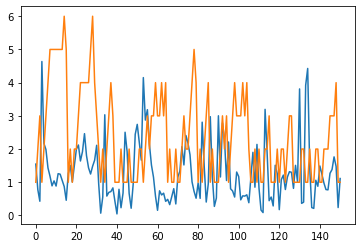

In [177]:

N_CLIENTES = 0
TAXA_CHEGADA = 2
TAXA_ATENDIMENTO = 3
LIMITE = 300
TEMPO_CHEGADA = []
TEMPO_SAIDA = []
PESSOAS_NO_TEMPO = []
TEMPO = []
N_ATENDENTES = 2

def subItens(a, b):
  c = []
  n = len(a)
  for i in range(n):
    c.append(a[i] - b[i])
  return c

def chegada(env):
  global N_CLIENTES
  global PESSOAS_NO_TEMPO
  global TEMPO_CHEGADA
  
  while True:
    yield env.timeout(np.random.exponential(TAXA_CHEGADA))
    N_CLIENTES = N_CLIENTES + 1
    PESSOAS_NO_TEMPO.append(N_CLIENTES)
    TEMPO_CHEGADA.append(env.now)
    TEMPO.append(env.now)
    if (N_CLIENTES == 1):
      env.process(atendimento(env))

def atendimento(env):
  global N_CLIENTES
  global PESSOAS_NO_TEMPO
  global TEMPO_SAIDA
  global N_ATENDENTES

  while (N_CLIENTES > 0):
    yield env.timeout(np.random.exponential(TAXA_ATENDIMENTO / N_ATENDENTES))
    N_CLIENTES = N_CLIENTES - 1
    TEMPO_SAIDA.append(env.now)

def systemSim():
  global CLIENTES
  global PESSOAS_NO_TEMPO
  global TEMPO_CHEGADA
  global TEMPO_SAIDA
  global N_ATENDENTES

  N_CLIENTES = 0
  TEMPO_CHEGADA = []
  TEMPO_SAIDA = []
  PESSOAS_NO_TEMPO = []

  env = sp.Environment()
  env.process(chegada(env))
  if (N_CLIENTES > 0):
    env.process(atendimento(env))
  env.run(until=LIMITE)

  return (PESSOAS_NO_TEMPO, TEMPO_SAIDA, TEMPO_CHEGADA)

systemSim()

TEMPO_DE_ESPERA = subItens(TEMPO_SAIDA, TEMPO_CHEGADA)
TEMPO_DE_ESPERA_MEDIO = []
TAMANHO_MEDIO_FILA = []

for i in range(len(TEMPO_DE_ESPERA)):
  TEMPO_DE_ESPERA_MEDIO.append((TEMPO_SAIDA[i] - TEMPO_CHEGADA[i])/PESSOAS_NO_TEMPO[i])
  TAMANHO_MEDIO_FILA.append(TAXA_CHEGADA*TEMPO_DE_ESPERA_MEDIO[i])

mp.plot(TEMPO_DE_ESPERA_MEDIO, label="Tempo de espera médio")
mp.plot(PESSOAS_NO_TEMPO, label="Pessoas em função do tempo")
print(N_CLIENTES)
#mp.plot(TAMANHO_MEDIO_FILA, label='Tamanho médio da fila')

3. Terceira Questão

In [99]:
from simpy.core import Infinity
N_CLIENTES = 0
N_CLIENTES_P = 0 # NUMERO DE CLIENTES COM PRIORIDADE
TAXA_CHEGADA = 2
TAXA_CHEGADA_P = 15 #Infinity
TAXA_ATENDIMENTO = 3
N_ATENDENTES = 1
LIMITE = 300

def chegada(env):
  global N_CLIENTES
  global N_CLIENTES_P
  
  while True:
    yield env.timeout(np.random.exponential(TAXA_CHEGADA))
    N_CLIENTES = N_CLIENTES + 1
    print("Alguém chegou                  \t (N_CLIENTES_P = ", N_CLIENTES_P, "N_CLIENTES = ", N_CLIENTES, "em t = ", str(env.now), ")")
    if (N_CLIENTES_P == 0 and N_CLIENTES == 1):
      env.process(atendimento(env))

def chegadaP(env):
  global N_CLIENTES_P
  
  while True:
    yield env.timeout(np.random.exponential(TAXA_CHEGADA_P))
    N_CLIENTES_P = N_CLIENTES_P + 1
    print("Alguém com prioridade chegou  \t (N_CLIENTES_P = ", N_CLIENTES_P, "N_CLIENTES = ", N_CLIENTES, "em t = ", str(env.now), ")")
    if (N_CLIENTES_P == 1):
      env.process(atendimentoP(env))

def atendimento(env):
  global N_CLIENTES
  global N_CLIENTES_P
  
  while (N_CLIENTES > 0):
    yield env.timeout(np.random.exponential(TAXA_ATENDIMENTO))
    if (N_CLIENTES_P == 0):
      N_CLIENTES = N_CLIENTES - 1
      print("Alguem saiu                  \t (N_CLIENTES_P = ", N_CLIENTES_P, "N_CLIENTES = ", N_CLIENTES, "em t = ", str(env.now), ")")
    
def atendimentoP(env):
  global N_CLIENTES_P
  
  while (N_CLIENTES_P > 0):
    yield env.timeout(np.random.exponential(TAXA_ATENDIMENTO))
    N_CLIENTES_P = N_CLIENTES_P - 1
    print("Alguem com prioridade saiu   \t (N_CLIENTES_P = ", N_CLIENTES_P, "N_CLIENTES = ", N_CLIENTES, "em t = ", str(env.now), ")")

def systemSim():
  global N_CLIENTES
  global N_CLIENTES_P

  N_CLIENTES = 0
  N_CLIENTES_P = 0

  env = sp.Environment()
  env.process(chegada(env))
  env.process(chegadaP(env))
  if (N_CLIENTES_P > 0):
    env.process(atendimentoP(env))
  elif (N_CLIENTES_P == 0):
    if (N_CLIENTES > 0):
      env.process(atendimento(env))
  env.run(until=LIMITE)
  
  return (N_CLIENTES + N_CLIENTES_P)

print(systemSim())

Alguém chegou                  	 (N_CLIENTES_P =  0 N_CLIENTES =  1 em t =  2.377105496819712 )
Alguém chegou                  	 (N_CLIENTES_P =  0 N_CLIENTES =  2 em t =  2.8036914755300044 )
Alguém chegou                  	 (N_CLIENTES_P =  0 N_CLIENTES =  3 em t =  7.023154699333437 )
Alguem saiu                  	 (N_CLIENTES_P =  0 N_CLIENTES =  2 em t =  7.074267498383698 )
Alguém com prioridade chegou  	 (N_CLIENTES_P =  1 N_CLIENTES =  2 em t =  8.291681606574238 )
Alguem com prioridade saiu   	 (N_CLIENTES_P =  0 N_CLIENTES =  2 em t =  8.344517043844109 )
Alguem saiu                  	 (N_CLIENTES_P =  0 N_CLIENTES =  1 em t =  8.704040221024467 )
Alguém chegou                  	 (N_CLIENTES_P =  0 N_CLIENTES =  2 em t =  8.71579227659842 )
Alguem saiu                  	 (N_CLIENTES_P =  0 N_CLIENTES =  1 em t =  10.962803462007022 )
Alguém chegou                  	 (N_CLIENTES_P =  0 N_CLIENTES =  2 em t =  12.04198201202163 )
Alguém chegou                  	 (N_CLIENTES_P =